In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv("F:\Data\Experimental/train.csv")
test = pd.read_csv("F:\Data\Experimental/test.csv")

In [3]:
train_Y=train.fake
train_Y=pd.DataFrame(train_Y)

In [4]:
train_X= train.drop(columns='fake')

In [5]:
test_Y=test.fake
test_Y=pd.DataFrame(test_Y)

In [6]:
test_X= test.drop(columns='fake')

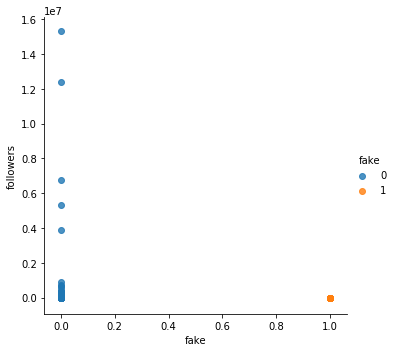

In [25]:
sns.lmplot(x="fake", y="followers",data = train, fit_reg=True, hue='fake')

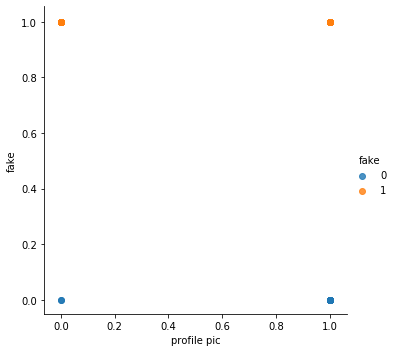

In [24]:
sns.lmplot(x="profile pic", y="fake",data = train, fit_reg=False, hue='fake')

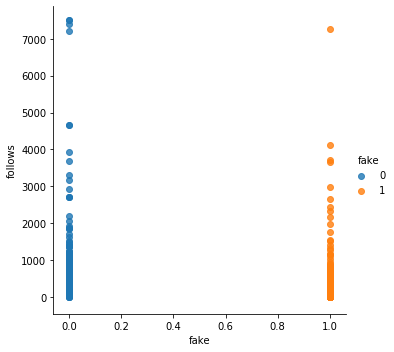

In [26]:
sns.lmplot(x="fake", y="follows",data = train, fit_reg=True, hue='fake')

In [7]:
print('Training Features Shape:', train_X.shape)
print('Training Labels Shape:', train_Y.shape)
print('Testing Features Shape:', test_X.shape)
print('Testing Labels Shape:', test_Y.shape)

Training Features Shape: (576, 11)
Training Labels Shape: (576, 1)
Testing Features Shape: (120, 11)
Testing Labels Shape: (120, 1)


In [8]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(train_X, train_Y);

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


In [9]:
predictions = knn.predict(test_X)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(knn.score(test_X, test_Y)))

Accuracy of logistic regression classifier on test set: 0.87


In [10]:
from sklearn.metrics import classification_report
print(classification_report(test_Y,predictions))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87        60
           1       0.91      0.82      0.86        60

    accuracy                           0.87       120
   macro avg       0.87      0.87      0.87       120
weighted avg       0.87      0.87      0.87       120



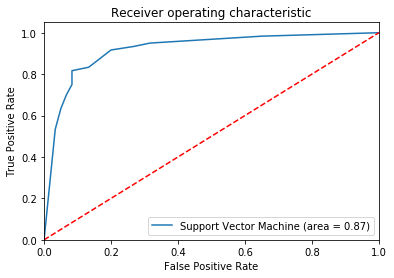

In [11]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
knn_roc_auc = roc_auc_score(test_Y, knn.predict(test_X))
fpr, tpr, thresholds = roc_curve(test_Y, knn.predict_proba(test_X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Support Vector Machine (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC For KNN Model')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()